In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

# Dummy data to plot with pyplot

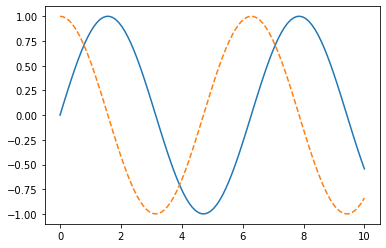

In [46]:
import numpy as np
x = np.linspace(0, 10, 100)
#print(x)
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

# Let's import our dataset with Pandas

In [47]:
import pandas as pd

In [48]:
df = pd.read_csv('fortune500.csv')

In [49]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [50]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


# Let’s just rename those columns so we can refer to them later

In [51]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

In [52]:
len(df)

25500

In [53]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

# Let's make sure we have only numeric values in the "profit" column

In [54]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [55]:
#print non_numberic_profits
set(df.profit[non_numberic_profits])

{'N.A.'}

In [56]:
len(df.profit[non_numberic_profits])

369

Text(0.5, 1.0, 'Number of null fields in the profit column per year')

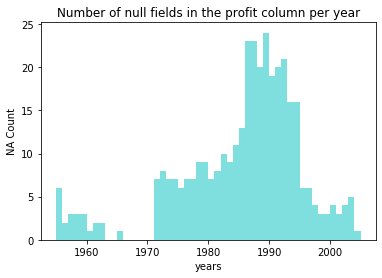

In [57]:
n, bins, patches = plt.hist(df.year[non_numberic_profits].values, bins=range(1955, 2006), color='c', alpha=0.5)

plt.xlabel('years')
plt.ylabel('NA Count')
plt.title('Number of null fields in the profit column per year')

In [58]:
type(df.year[non_numberic_profits]) # that's why we used df.year[non_numberic_profits].values in plt.hist()


pandas.core.series.Series

In [59]:
df = df.loc[~non_numberic_profits]

In [60]:
len(df)

25131

In [61]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [62]:
df.profit = pd.to_numeric(df.profit) #df.profit.convert_objects(convert_numeric=True)

In [63]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

# Plotting with matplotlib

In [64]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
group_by_year.head()
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit
y2 = avgs.revenue

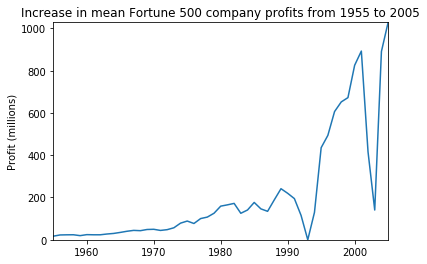

In [65]:
fig, ax = plt.subplots()
ax.set_title("Increase in mean Fortune 500 company profits from 1955 to 2005")
ax.set_ylabel("Profit (millions)")
ax.plot(x, y1)
ax.margins(x=0, y=0)

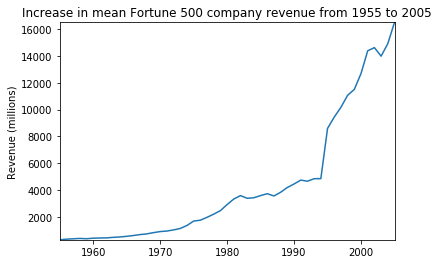

In [66]:
fig, ax = plt.subplots()
ax.set_title("Increase in mean Fortune 500 company revenue from 1955 to 2005")
ax.set_ylabel("Revenue (millions)")
ax.plot(x, y2)
ax.margins(x=0, y=0)

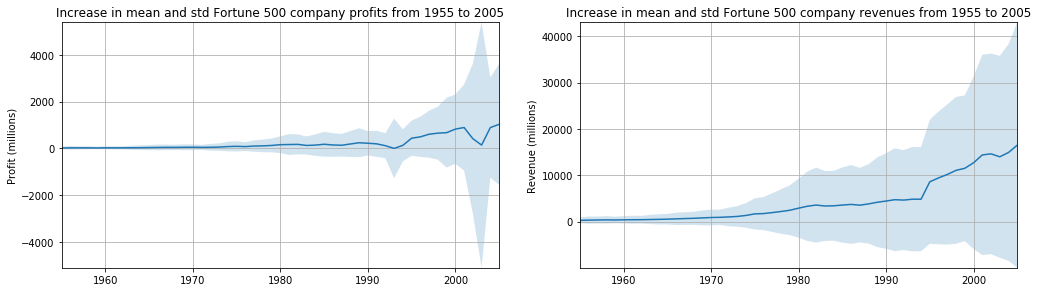

In [67]:
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
# set up the figure
fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
fig.set_size_inches(14, 4)
fig.tight_layout(w_pad=5, h_pad=1.0)
# set up the subplots
ax1.plot(x, y1)
ax2.plot(x, y2)
ax1.fill_between(x, y1.values - stds1, y1.values + stds1, alpha=0.2)
ax2.fill_between(x, y2.values - stds2, y2.values + stds2, alpha=0.2)
ax1.set_title(title % 'profits')
ax2.set_title(title % 'revenues')
ax1.set_ylabel("Profit (millions)")
ax2.set_ylabel("Revenue (millions)")
ax1.margins(x=0, y=0)
ax2.margins(x=0, y=0)
ax1.grid(True)
ax2.grid(True)

## Ploting with plotly

# to list installed python modules:
pydoc modules

##to install modules in my home directotry:

pip install --user <module_name>

In [69]:
import plotly

ModuleNotFoundError: No module named 'plotly'

In [70]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

ModuleNotFoundError: No module named 'plotly'

In [34]:
#df_avgs = pd.DataFrame(list(zip(x,y1,y2)),columns=["x","y1","y2"])
labels = x[:10]
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x = x[:10], y = y1[:10], name="Profits"),row=1, col=1)
fig.add_trace(go.Scatter(x = x[:10], y = y2[:10], name="Revenues"),row=1, col=2)
#fig.add_trace(go.Pie(labels=labels, values=y2[:10], name="revenues"),1, 2)
fig.update_layout(title_text='increase in 500 companies profit and revenue')

NameError: name 'make_subplots' is not defined

In [ ]:
fig2 = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.02)
fig2.add_trace(go.Scatter(x = x[:10], y = y1[:10], name="Profits"),row=1, col=1)
fig2.add_trace(go.Scatter(x = x[:10], y = y2[:10], name="Revenues"),row=2, col=1)


In [ ]:
fig3 = make_subplots(rows=1, cols=2, shared_xaxes=True)
fig3.add_trace(go.Bar(x = x[:10], y = y1[:10], name="Profits"),row=1, col=1)
fig3.add_trace(go.Bar(x = x[:10], y = y2[:10], name="Revenues"),row=1, col=2)

In [39]:
df['company'].head()

0      General Motors
1         Exxon Mobil
2          U.S. Steel
3    General Electric
4              Esmark
Name: company, dtype: object

In [40]:
df['company'][0]

'General Motors'

In [41]:
GenMot_exx = df.loc[(df['company']=='General Motors') | (df['company']== "Exxon Mobil")]

In [42]:
GenMot_exx.tail()

,year,rank,company,revenue,profit
24002,2003,3,Exxon Mobil,182466.0,11460.0
24501,2004,2,Exxon Mobil,213199.0,21510.0
24502,2004,3,General Motors,195645.2,3822.0
25001,2005,2,Exxon Mobil,270772.0,25330.0
25002,2005,3,General Motors,193517.0,2805.0


In [43]:
fig = go.Figure(data=[go.Pie(labels=GenMot_exx.loc[GenMot_exx['year'] == 2005,'company'], values=GenMot_exx.loc[GenMot_exx['year'] == 2005,'profit'])])
fig.show()

NameError: name 'go' is not defined